Dataset Link [Cat and Dog](https://www.kaggle.com/tongpython/cat-and-dog)

In [0]:
!pip install kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing all libraries**

In [1]:
import os 
import zipfile 
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


Using TensorFlow backend.


**Download Dataset**

In [0]:
!kaggle datasets download -d tongpython/cat-and-dog

**Unzip dataset**

In [0]:
local_dir='/content/cat-and-dog.zip'
zip_ref=zipfile.ZipFile(local_dir,'r')
zip_ref.extractall('/tmp')
zip_ref.close

In [0]:
train_dir=os.path.join('/tmp/training_set/training_set')
validation_dir=os.path.join('/tmp/test_set/test_set')

**Build the CNN model & Compile the model**

In [4]:

model=keras.models.Sequential([
                               keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(150,150,3)),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(64,(3,2),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               keras.layers.Conv2D(256,(3,3),activation='relu',padding='valid'),
                               keras.layers.MaxPool2D(pool_size=(2,2)),
                               #keras.layers.Conv2D(512,(3,3),activation='relu',padding='valid'),
                               #keras.layers.MaxPool2D(pool_size=(2,2)),
                               
                              
                           
                              tf.keras.layers.Dropout(0.5),
                               
                               
                               keras.layers.Flatten(),
                               keras.layers.Dense(units=512,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=256,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=128,activation=tf.nn.relu),
                               
                               keras.layers.Dense(units=64,activation=tf.nn.relu),
                               
                               
                               keras.layers.Dense(units=1,activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 73, 64)        12352     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

**image preprocessing**

In [5]:
train_data_generator=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_data_generator=ImageDataGenerator(
     rescale=1./255
)
train_generator = train_data_generator.flow_from_directory(train_dir,
                                                    batch_size=160,
                                                    class_mode='binary',
                                                    target_size=(150,150)) 
validation_generator =validation_data_generator.flow_from_directory(validation_dir,
                                                         batch_size=80,
                                                         class_mode  = 'binary',
                                                         target_size = (150,150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


**Fit the model on images**

In [6]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=50,
                              epochs=100,
                              validation_steps=25,
                              verbose=1)

Epoch 1/100
50/50 [==============================] - 56s 1s/step - loss: 0.6920 - accuracy: 0.5165 - val_loss: 0.6962 - val_accuracy: 0.4990
Epoch 2/100
50/50 [==============================] - 57s 1s/step - loss: 0.6790 - accuracy: 0.5694 - val_loss: 0.6909 - val_accuracy: 0.5330
Epoch 3/100
50/50 [==============================] - 57s 1s/step - loss: 0.6673 - accuracy: 0.5894 - val_loss: 0.6787 - val_accuracy: 0.5660
Epoch 4/100
50/50 [==============================] - 57s 1s/step - loss: 0.6589 - accuracy: 0.6045 - val_loss: 0.6943 - val_accuracy: 0.5625
Epoch 5/100
50/50 [==============================] - 57s 1s/step - loss: 0.6468 - accuracy: 0.6180 - val_loss: 0.6123 - val_accuracy: 0.6595
Epoch 6/100
50/50 [==============================] - 57s 1s/step - loss: 0.6335 - accuracy: 0.6465 - val_loss: 0.6494 - val_accuracy: 0.6140
Epoch 7/100
50/50 [==============================] - 57s 1s/step - loss: 0.6210 - accuracy: 0.6528 - val_loss: 0.5941 - val_accuracy: 0.6680
Epoch 8/100
5

**Training and validation accuracy & loss**

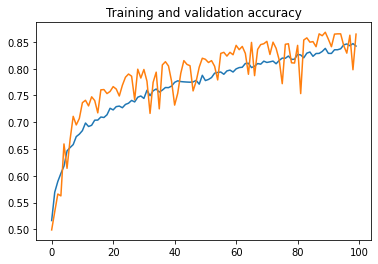

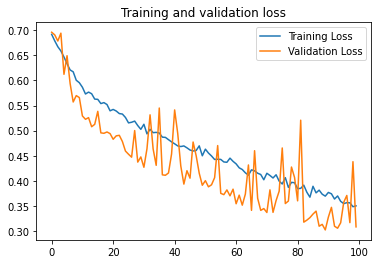

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss,  label='Training Loss')
plt.plot(epochs, val_loss,  label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()